<a href="https://colab.research.google.com/github/Banafshehkh/Interview_Preparation/blob/main/Website_Traffic_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/MyDrive/interview/Thecleverprogrammer.csv")
data.head(2)

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798


In [9]:
data.isnull().sum()

Date     0
Views    0
dtype: int64

In [11]:
data.value_counts()

Date        Views
01/01/2022  4478     1
19/11/2021  8336     1
21/07/2021  7494     1
21/06/2022  11426    1
21/06/2021  8298     1
                    ..
10/11/2021  9612     1
10/10/2021  7251     1
10/09/2021  7059     1
10/08/2021  9104     1
31/12/2021  5033     1
Length: 391, dtype: int64

In [20]:
data["Date"] = pd.to_datetime(data["Date"],
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


In [21]:
data.head(2)

,Date,Views
0,2021-01-06,7831
1,2021-02-06,7798


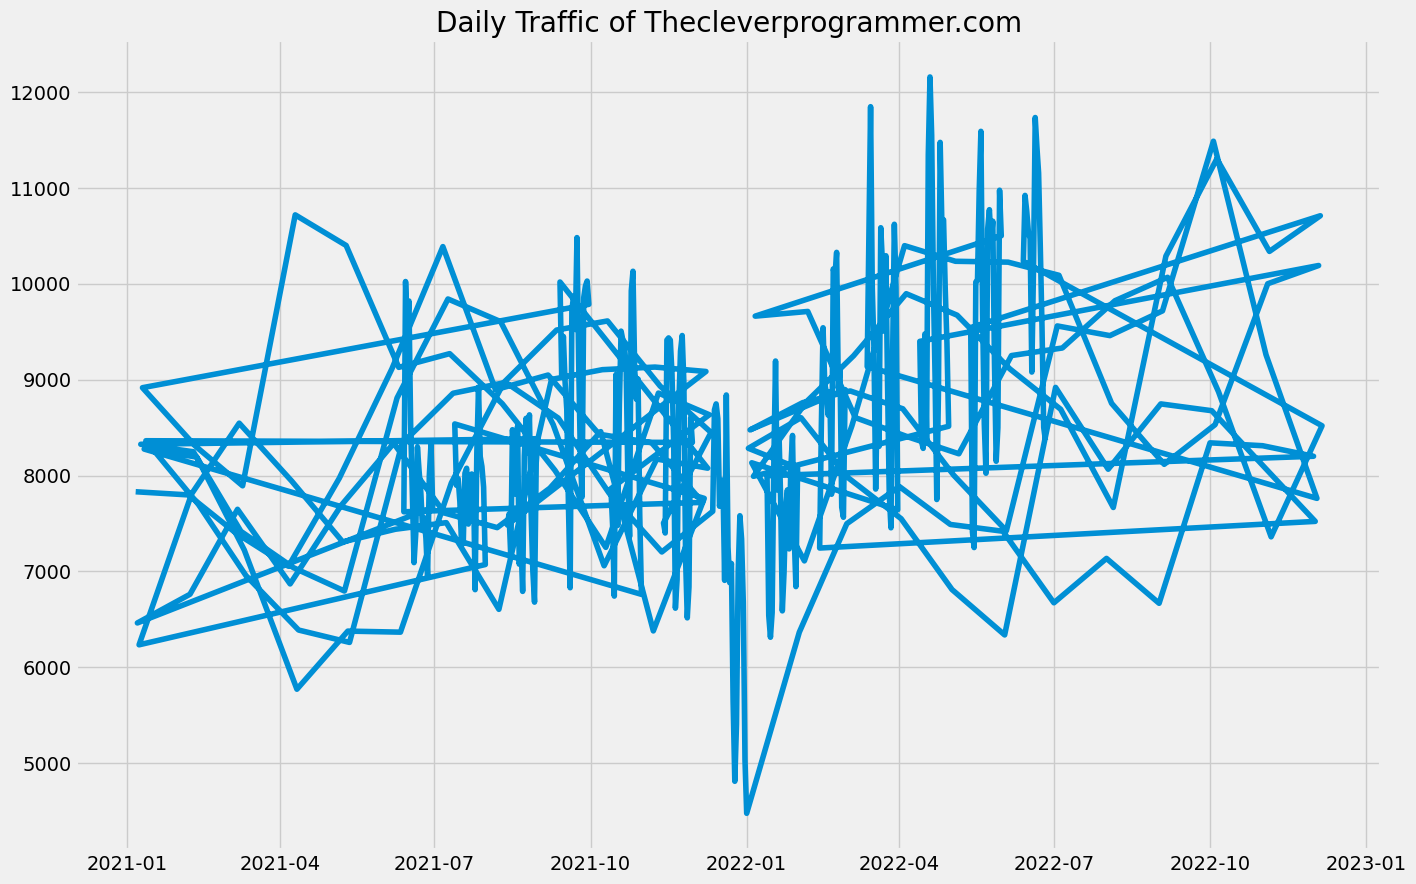

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

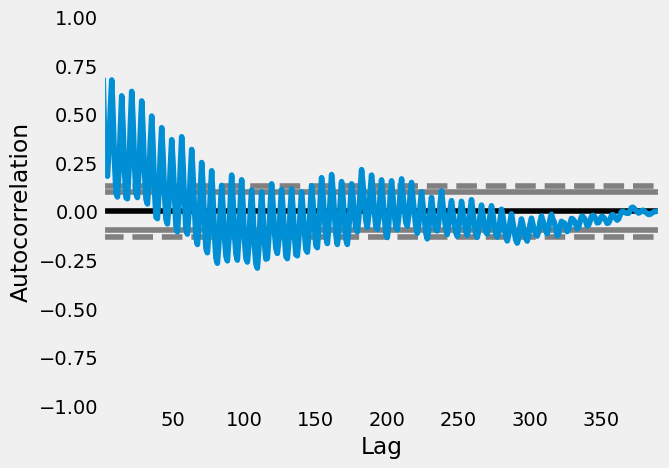

In [27]:
pd.plotting.autocorrelation_plot(data["Views"])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


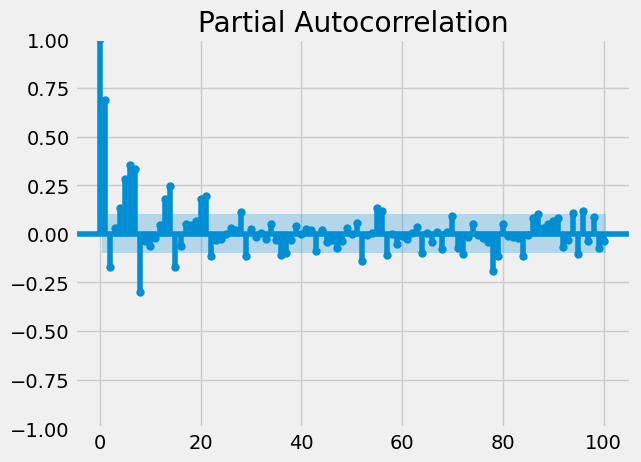

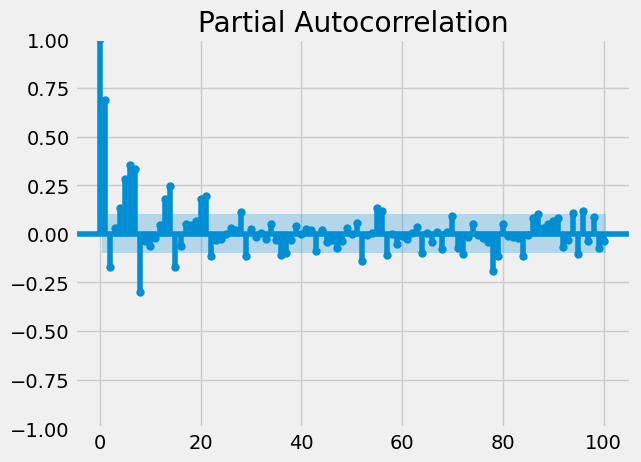

In [32]:
plot_pacf(data["Views"], lags = 100)

In [ ]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
data["Views"].plot(legend=True, label="Training Data",
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")